In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import linregress
from empiricaldist import Pmf

In [2]:
# Define global variables
title_param    = {'color': 'darkred', 'fontsize': 14, 'weight': 'bold'}
SEED = 17

In [3]:
# Read data
brfss = pd.read_hdf(r'datasets/brfss.hdf5')
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


# 3. Relationships

Up until this point, you've only looked at one variable at a time. In this chapter, you'll explore relationships between variables two at a time, using scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS). You'll also learn how to quantify those relationships using correlation and simple regression.

# <font color=darkred>3.1 Exploring relationships</font>

1. Exploring relationships
>So far we have only looked at one variable at a time. Now it's time to explore relationships between variables.

2. Height and weight
>As a first example, we'll look at the relationship between height and weight. I'll use data from the Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Control. The survey includes more than 400,000 respondents, but to keep things manageable, we'll use a random subsample of 100,000.

3. Scatter plot
>A common way to visualize the relationship between two variables is a scatter plot. Scatter plots are common and readily understood, but they are surprisingly hard to get right. To demonstrate, I'll load the BRFSS dataset and extract the variables for height in centimeters and weight in kilograms. pyplot provides a scatter() function that makes a scatter plot, but it is more versatile than we need and slower than we want. It is faster to use plot() with the format string 'o', which plots a circle for each data point. And, as always, we have to label the axes.

4. Overplotting
>Here's what it looks like. In general, it looks like taller people are heavier, but there are a few things about this scatter plot that make it hard to interpret. Most importantly, it is "overplotted", which means that there are data points piled on top of each other so you can't tell where there are a lot of points and where there is just one. When that happens, the results can be really misleading.

5. Transparency
>One way to improve it is to use transparency, which we can do with the alpha parameter. The lower the value of alpha, the more transparent each data point is. Here's what it looks like with alpha=0.02. This is better, but there are so many data points, the scatter plot is still overplotted. The next step is to make the markers smaller.

6. Marker size
>With markersize=1 and a low value of alpha, the scatter plot is less saturated. Here's what it looks like. Again, this is better, but now we can see that the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters. We can break up the columns by adding some random noise to the values; in effect, we are filling in the values that got rounded off.

7. Jittering
>Adding random noise like this is called "jittering". In this example, I added noise with mean 0 and standard deviation 2. Here's what the plot looks like when we jitter height. The columns are gone, but now we can see that there are rows where people rounded off their weight. We can fix that by jittering weight, too.

8. More jittering
>Here's the code. And here's the result. Finally, let's zoom in on the area where most of the data points are.

9. Zoom
>The pyplot function axis() sets the lower and upper bounds for the x- and y-axis; in this case, we plot heights from 140 to 200 centimeters and weights up to 160 kilograms. Here's what it looks like. Finally, we have a reliable picture of the relationship between height and weight.

10. Before and after
>Here's the plot we started with and the one we ended with. Clearly, they are very different, and they suggest different stories about the relationship between these variables. The point of this example is that it takes some effort to make an effective scatter plot.

11. Let's explore!
>In the next lesson we'll see other ways to visualize relationships between variables, but first you'll have a chance to explore the relationship between age and weight.

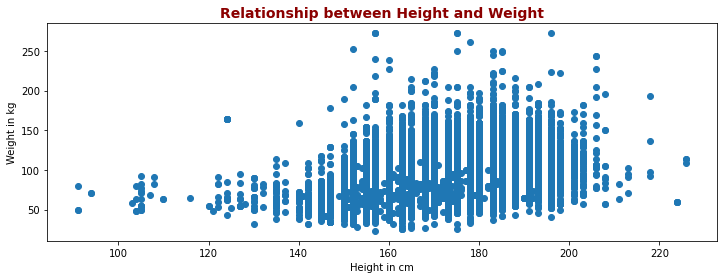

In [4]:
height = brfss['HTM4']
weight = brfss['WTKG3']

# Scatter plot
fig = plt.figure(figsize=(12,4))
plt.scatter(height, weight)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title("Relationship between Height and Weight", **title_param)
plt.show()

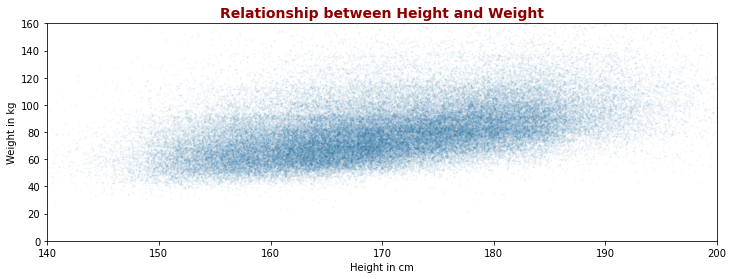

In [5]:
# Scatter plot - with plt.plot
fig = plt.figure(figsize=(12,4))
height_jitter = brfss['HTM4'] + np.random.normal(0, 2, size=len(brfss))
weight_jitter = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.04)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title("Relationship between Height and Weight", **title_param)
plt.axis([140, 200, 0, 160])
plt.show()

# <font color=darkred>3.2 PMF of age</font> 

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

**Instructions**
- Extract the variable 'AGE' from the DataFrame brfss and assign it to age.
- Get the PMF of age and plot it as a bar chart.

**Results**

<font color=darkgreen>Ok, we're off to a good start. Notice that the last age range is bigger than the others. That's the kind of thing you see when you plot distributions.</font>

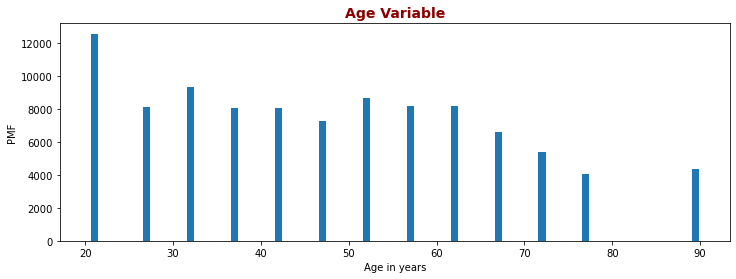

In [6]:
# Extract age
age = brfss.AGE

# Plot the PMF
fig = plt.figure(figsize=(12,4))
pmf_age = Pmf.from_seq(age, normalize=False)
pmf_age.bar()
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.title("Age Variable", **title_param)
plt.show()

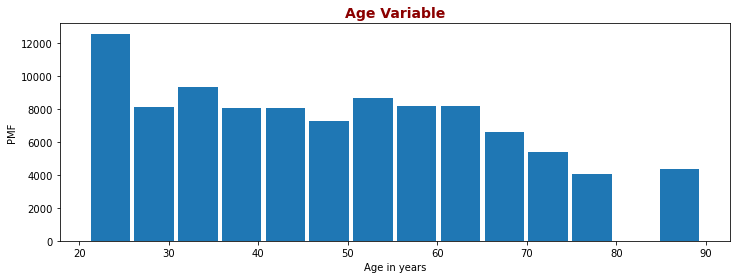

In [7]:
# Extract age
age = brfss.AGE

# Plot the PMF
fig = plt.figure(figsize=(12,4))
age.plot(kind='hist', bins=14, rwidth=.9)
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.title("Age Variable", **title_param)
plt.show()

# <font color=darkred>3.3 Scatter plot</font> 

Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

**Instructio**
- Make a scatter plot of weight and age with format string 'o' and alpha=0.1.ns

**Results**

<font color=darkgreen>So far so good. By adjusting alpha we can avoid saturating the plot. Next we'll jitter the data to break up the columns.</font>

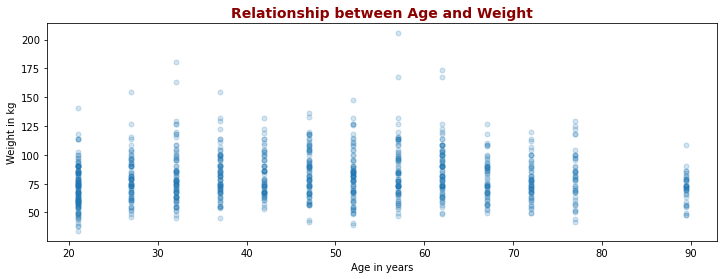

In [8]:
# Select the first 1000 respondents
brfss_subset = brfss[:1000]

# Extract age and weight
age = brfss_subset['AGE']
weight = brfss_subset['WTKG3']

# Make a scatter plot
fig = plt.figure(figsize=(12,4))
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)
plt.title("Relationship between Age and Weight", **title_param)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

# <font color=darkred>3.4 Jittering</font> 

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:

<code>
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
</code>

**Instructions**
- Add random noise to age with mean 0 and standard deviation 2.5.
- Make a scatter plot between weight and age with marker size 5 and alpha=0.2. Be sure to also specify 'o'.

**Results**

<font color=darkgreen>Excellent. By smoothing out the ages and avoiding saturation, we get the best view of the data. But in this case the nature of the relationship is still hard to see. In the next lesson, we'll see some other ways to visualize it.</font>

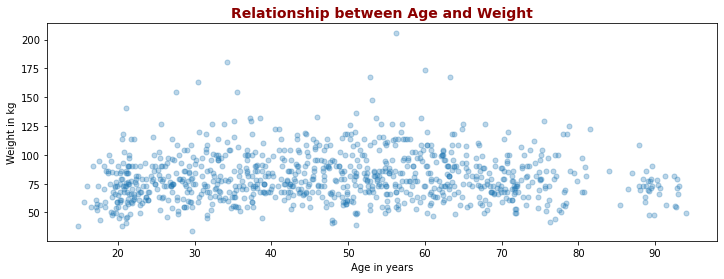

In [9]:
# Select the first 1000 respondents
brfss_subset = brfss[:1000]

# Add jittering to age
age_jitter = brfss_subset['AGE'] + np.random.normal(0, 2.5, size=len(brfss_subset))
# Extract weight
weight = brfss_subset['WTKG3']

# Make a scatter plot
fig = plt.figure(figsize=(12,4))
plt.plot(age_jitter, weight, 'o', markersize=5, alpha=0.3)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title("Relationship between Age and Weight", **title_param)
plt.show()

# <font color=darkred>3.5 Visualizing relationships</font>

1. Visualizing relationships
>In the previous lesson we used scatter plots to visualize relationships between variables, and in the exercise, you explored the relationship between age and weight. In this lesson, we'll see other ways to visualize these relationships, including boxplots and violin plots.

2. Weight and age
>In the previous exercises, you made a scatter plot of weight versus age. Your code probably looked like this. And the results looked like this. It looks like older people might be heavier, but it is hard to see clearly.

3. More data
>For the exercises, you worked with a small subset of the data. Now let's see what it looks like with more data. Here's the code. And here's the plot. I made a few changes in the code: * First, I reduced the marker size, because we have more data now, * Second, I jittered the weights, so the horizontal rows are not visible. * I jitter the ages, too, but less than in the exercise, so the data points are spread out, but there's still space between the columns. That makes it possible to see the shape of the distribution in each age group, and the differences between groups. If we take this idea one step farther, we can use KDE to estimate the density function in each column and plot it.

4. Violin plot
>And there's a name for that; it's called a violin plot. Seaborn provides a function that makes violin plots, but before we can use it, we have to get rid of any rows with missing data. Here's how. dropna() creates a new DataFrame that contains the rows from brfss where AGE and WTKG3 are not NaN. Now we can call violinplot(). The x and y parameters mean we want AGE on the x-axis and WTKG3 on the y-axis. data is the DataFrame we just created, which contains the variables we're going to plot. The parameter inner=None simplifies the plot a little. Here's what it looks like. Each column is a graphical representation of the distribution of weight in one age group. The width of these shapes is proportional to the estimated density, so it's like two vertical PDFs plotted back to back, and filled in with nice colors. There's one other way to look at data like this, called a box plot.

5. Box plot
>The code to generate a box plot is very similar. I put in the parameter whis=10 to turn off a feature we don't need. If you are curious about it, you can read the documentation or check out DataCamp's Seaborn courses. Here's what it looks like. Each box represents the interquartile range, or IQR, from the 25th to the 75th percentile. The line in the middle of each box is the median. The spines sticking out of the top and bottom show the minimum and maximum values. In my opinion, this plot gives us the best view of the relationship between weight and age. Looking at the medians, it seems like people in their 40s are the heaviest; younger and older people are lighter. Looking at the sizes of the boxes, it seems like people in their 40s have the most variability in weight, too. These plots also show how skewed the distribution of weight is; that is, the heaviest people are much farther from the median than the lightest people.

6. Log scale
>For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale. We can do that with the pyplot function yscale(). Here's what it looks like. To show the relationship between age and weight most clearly, this is probably the figure I would use.

7. Let's practice!
>Now let's get some practice with violin and box plots.

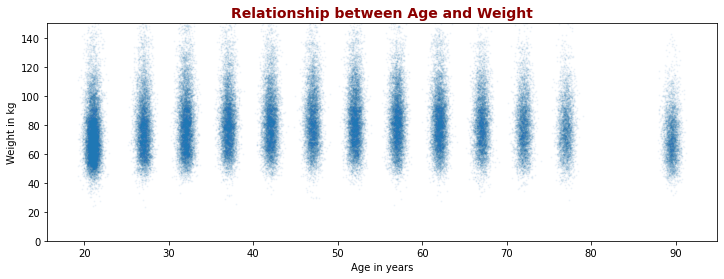

In [10]:
# Extract weight and age add jittering both
weight_jitter = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
age_jitter = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))

# Make the plot
fig = plt.figure(figsize=(12,4))
plt.plot(age_jitter, weight_jitter, 'o', markersize=1, alpha=0.05)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.ylim(0, 150)
plt.title("Relationship between Age and Weight", **title_param)
plt.show()

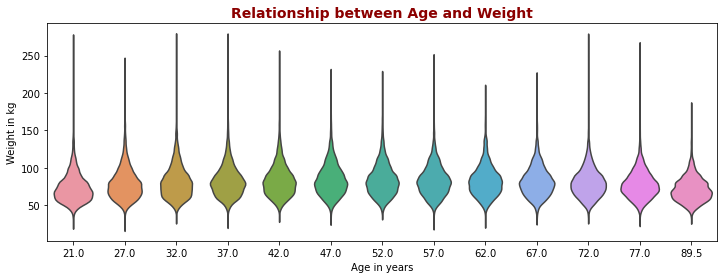

In [11]:
# Violin plot
data = brfss.dropna(subset=['AGE', 'WTKG3'])

# Make the plot
fig = plt.figure(figsize=(12,4))
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
#plt.axis([20, 90, 0, 150])
plt.title("Relationship between Age and Weight", **title_param)
plt.show()

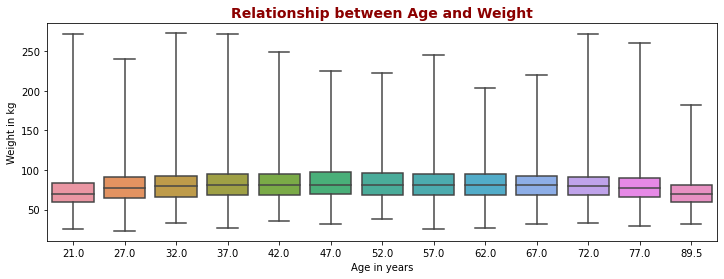

In [12]:
# Box plot
data = brfss.dropna(subset=['AGE', 'WTKG3'])

# Make the plot
fig = plt.figure(figsize=(12,4))
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title("Relationship between Age and Weight", **title_param)
plt.show()

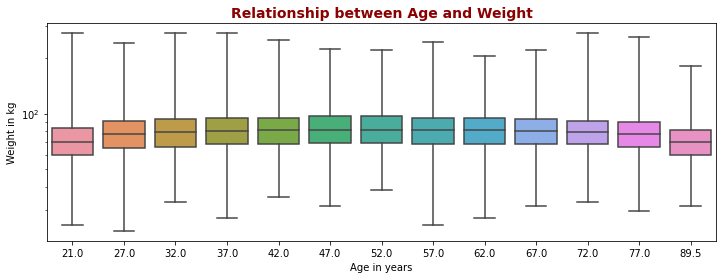

In [13]:
# Box plot in log scale
data = brfss.dropna(subset=['AGE', 'WTKG3'])

# Make the plot
fig = plt.figure(figsize=(12,4))
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.yscale('log')
plt.title("Relationship between Age and Weight", **title_param)
plt.show()

# <font color=darkred>3.6 Height and weight</font> 

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

Recall how Allen created the box plot of 'AGE' and 'WTKG3' in the video, with the y-axis on a logarithmic scale:

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')

**Instructions**
- Fill in the parameters of .boxplot() to plot the distribution of weight ('WTKG3') in each height ('\_HTMG10') group. Specify whis=10, just as was done in the video.
- Add a line to plot the y-axis on a logarithmic scale.

**Results**

<font color=darkgreen>Very good. These box plots provide a good view of the relationship between the variables. They also show the spread of the values in each column.</font>

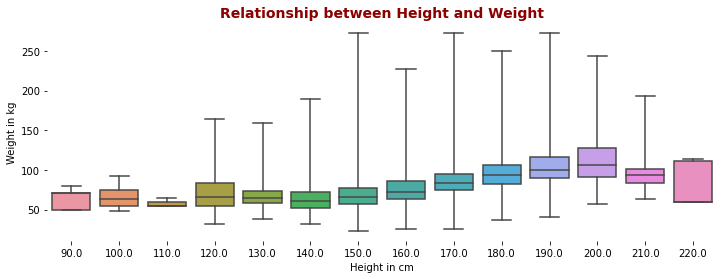

In [14]:
# Box plot
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make the plot
fig = plt.figure(figsize=(12,4))
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title("Relationship between Height and Weight", **title_param)
plt.show()

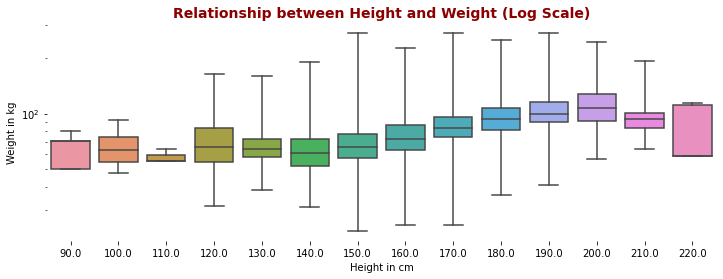

In [15]:
# Box plot in log scale
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make the plot
fig = plt.figure(figsize=(12,4))
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.yscale('log')
plt.title("Relationship between Height and Weight (Log Scale)", **title_param)
plt.show()

# <font color=darkred>3.7 Distribution of income</font> 

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all Pmf objects have a .bar() method.

**Instructions**
- Extract 'INCOME2' from the brfss DataFrame and assign it to income.
- Plot the PMF of income as a bar chart.

**Results**

<font color=darkgreen>Good work. Almost half of the respondents are in the top income category, so this dataset doesn't distinguish between the highest incomes and the median. But maybe it can tell us something about people with incomes below the median.</font>

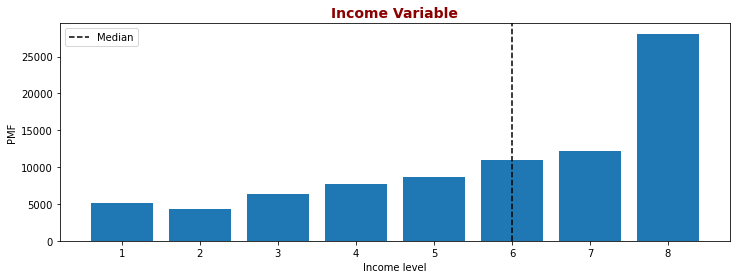

In [16]:
income = brfss.INCOME2

# Plot the PMF
fig = plt.figure(figsize=(12,4))
Pmf.from_seq(income, normalize=False).bar()
plt.axvline(income.median(), ls='--', color='k', label='Median')
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.legend()
plt.title("Income Variable", **title_param)
plt.show()# Extract age

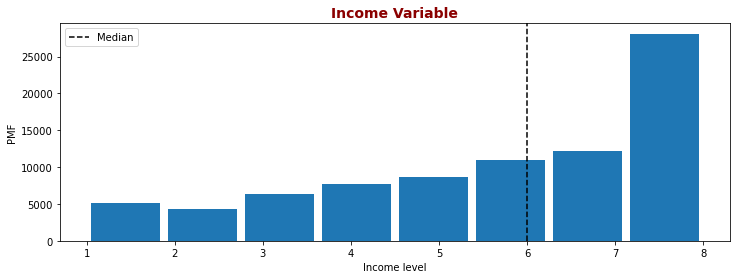

In [17]:
income = brfss.INCOME2

# Plot the PMF
fig = plt.figure(figsize=(12,4))
income.plot(kind='hist', bins=8, rwidth=.9, label='')
plt.axvline(income.median(), ls='--', color='k', label='Median')
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.legend()
plt.title("Income Variable", **title_param)
plt.show()

# <font color=darkred>3.8 Income and height</font> 

Let's now use a violin plot to visualize the relationship between income and height.

**Instructions**
- Create a violin plot to plot the distribution of height ('HTM4') in each income ('INCOME2') group. Specify inner=None to simplify the plot.

**Results**

<font color=darkgreen>Interesting. It looks like there is a weak positive relationsip between income and height, at least for incomes below the median. In the next lesson we'll see some ways to quantify the strength of this relationship.</font>

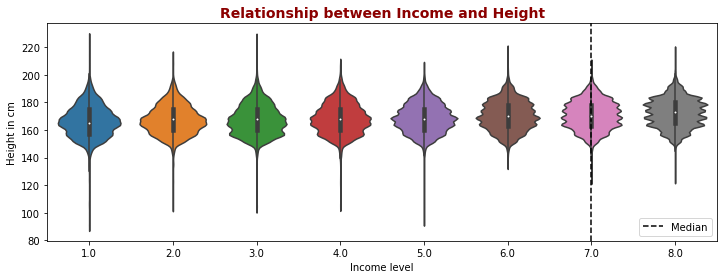

In [18]:
# Violin plot
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make the plot
fig = plt.figure(figsize=(12,4))
sns.violinplot(x='INCOME2', y='HTM4', data=data) #, inner=None
plt.axvline(data.INCOME2.median(), ls='--', color='k', label='Median')
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.legend(loc='lower right')
plt.title("Relationship between Income and Height", **title_param)
plt.show()

# <font color=darkred>3.9 Correlation</font>

1. Correlation
>In the previous lesson, we visualized relationships between pairs of variables. In this lesson we'll learn about the coefficient of correlation, which quantifies the strength of these relationships.

2. Correlation coefficient
>When people say "correlation" casually, they might mean any relationship between two variables. In statistics, it usually means Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables. To demonstrate, I'll select three columns from the BRFSS dataset, like this. The result is a DataFrame with just those columns. Now we can use the corr() method, like this.

3. Correlation matrix
>The result is a "correlation matrix". Reading across the first row, the correlation of HTM4 with itself is 1. That's expected; the correlation of anything with itself is 1. The next entry is more interesting; the correlation of height and weight is about 0 point 47. It's positive, which means taller people are heavier, and it is moderate in strength, which means it has some predictive value. If you know someone's height, you can make a better guess about their weight, and vice versa. The correlation between height and age is about -0 point 09. It's negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height. The correlation between age and weight is even smaller. It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is. So why is the correlation so low?

4. Weight and age
>Remember that the relationship between weight and age looks like this. People in their 40s are the heaviest; younger and older people are lighter. So this relationship is nonlinear.

5. Nonlinear relationships
>But correlation only works for linear relationships. If the relationship is nonlinear, correlation generally underestimates how strong it is. To demonstrate, I'll generate some fake data: xs contains equally-spaced points between -1 and 1. ys is xs squared plus some random noise. Here's the scatter plot of xs and ys. It's clear that this is a strong relationship; if you are given `x`, you can make a much better guess about y. But here's the correlation matrix; the computed correlation is close to 0. In general, if correlation is high -- that is, close to 1 or -1, you can conclude that there is a strong linear relationship. But if correlation is close to 0, that doesn't mean there is no relationship; there might be a strong, non-linear relationship. This is one of the reasons I think correlation is not such a great statistic.

6. You keep using that word
>There's another reason to be careful with correlation; it doesn't mean what people take it to mean. Specifically, correlation says nothing about slope. If we say that two variables are correlated, that means we can use one to predict the other. But that might not be what we care about.

7. Strength of relationship
>For example, suppose we are concerned about the health effects of weight gain, so we plot weight versus age, from 20 to 50 years old. Here are two fake datasets I generated. The one on the left has higher correlation, about 0 point 76 compared to 0 point 47. But on the left, the average weight gain over 30 years is less than 1 kg; on the right, it is almost 10 kilograms! In this scenario, the relationship on the right is probably more important, even though the correlation is lower. The statistic we really care about is the slope of the line.

8. Let's practice!
>In the next lesson, you'll learn how to estimate that slope. But first, let's practice with correlation.

In [19]:
# Correlation coefficient
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


## AN EXAMPLE TO EXPLAIN WHY PEARSON CORRELATION DOESN'T WORK WITH NON LINEAR RELATIONS

array([[ 1.        , -0.00352766],
       [-0.00352766,  1.        ]])

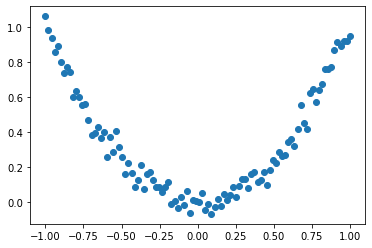

In [20]:
# Getting data
xs = np.linspace(-1, 1, 100)
ys = xs**2 + np.random.normal(0, 0.05, len(xs))

# Getting the pearson correlation
display(np.corrcoef(xs, ys))

# Make the plot to represent the data
fig = plt.figure()
plt.plot(xs, ys, 'o')
plt.show()

# <font color=darkred>3.10 Computing correlations</font> 

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

**Instructions**
- From the brfss DataFrame, select the columns 'AGE', 'INCOME2', and '_VEGESU1'.
- Compute the correlation matrix for these variables.

**Results**

<font color=darkgreen>So far, so good. In the next exercise you'll think about how to interpret these results.</font>

In [21]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
display(subset.corr())

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


# <font color=darkred>3.11 Interpreting correlations</font>

**Instructions**

In the previous exercise, the correlation between income and vegetable consumption is about 0.12. The correlation between age and vegetable consumption is about -0.01.

Which of the following are correct interpretations of these results:

    A: People with higher incomes eat more vegetables.
    B: The relationship between income and vegetable consumption is linear.
    C: Older people eat more vegetables.
    D: There could be a strong nonlinear relationship between age and vegetable consumption.

**Possible Answers**
- A and C only.
- B and D only.
- B and C only.
- <font color=red>A and D only</font>.


**Results**

<font color=darkgreen>Correct! The correlation between income and vegetable consumption is small, but it suggests that there is a relationship. But a correlation close to 0 does mean there is no relationship.</font>

# <font color=darkred>3.12 Simple regression</font>

1. Simple regression
>In the previous lesson we saw that correlation does not always measure what we really want to know. In this lesson, we look at an alternative - simple linear regression.

2. Strength of relationship
>Let's look again at an example from the previous lesson, a hypothetical relationship between weight and age. I generated two fake datasets to make a point: The one on the left has higher correlation, about 0 point 76 compared to 0 point 48. But in the one on the left, the average weight gain over 30 years is less than 1 kg; on the right, it is almost 10 kilograms! In this context, the statistic we probably care about is the slope of the line, not the correlation coefficient.

3. Strength of effect
>To estimate the slope of the line, we can use linregress() from the SciPy stats module. The result is a LinRegressResult object that contains five values: slope is the slope of the line of best fit for the data; intercept is the intercept. For Hypothetical #1, the estimated slope is about 0.019 kilograms per year or about 0.6 kilograms over the 30-year range.

4. Strength of effect
>Here are the results for Hypothetical #2. The estimated slope is about 10 times higher: about 0 point 18 kilograms per year or 6 kilograms per 30 years, What's called rvalue here is correlation, which confirms what we saw before; the first example has higher correlation, about 0 point 76 compared to 0 point 48. But the strength of the effect, as measured by the slope of the line, is about 10 times higher in the second example.

5. Regression lines
>We can use the results from linregress() to compute the line of best fit: first we get the min and max of the observed xs; then we multiply by the slope and add the intercept. And plot the line. Here's what that looks like for the first example. And the same thing for the second example. The visualization here might be misleading unless you look closely at the vertical scales; the slope on the right is almost 10 times higher.

6. Height and weight
>Now let's look at an example with real data. Here's the scatter plot of height and weight again, from Lesson 1.

7. Regression line
>Now we can compute the regression line. linregress() can't handle NaNs, so we have to use dropna() to remove rows that are missing the data we need. Now we can compute the linear regression. And here are the results. The slope is about 0 point 9 kilograms per centimeter, which means that we expect a person one centimeter taller to be almost a kilogram heavier. That's quite a lot.

8. Line of best fit
>As before, we can compute the line of best fit and plot it. And here's what that looks like. The slope of this line seems consistent with the scatter plot.

9. Linear relationships
>However, linear regression has the same problem as correlation; it only measures the strength of a linear relationship. Here's the scatter plot of weight versus age, which you saw in a previous exercise. People in their 40s are the heaviest; younger and older people are lighter. So the relationship is nonlinear.

10. Nonlinear relationships
>If we don't look at the scatter plot and blindly compute the regression line, here's what we get. The estimated slope is only 0 point 02 kilograms per year, or 0 point 6 kilograms in 30 years.

11. Not a good fit
>And here's what the line of best fit looks like. A straight line does not capture the relationship between these variables well.

12. Let's practice!
>In the next lesson, we'll learn how to use multiple regression to estimate non-linear relationships. But first, let's practice simple regression.

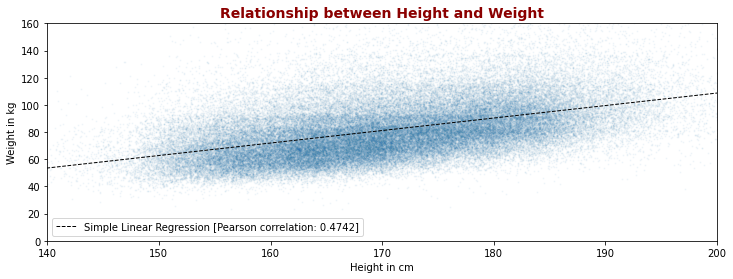

In [22]:
columns = ['WTKG3', 'HTM4']
subset = brfss.dropna(subset=columns)[columns]
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

# Scatter plot - with plt.plot
fig = plt.figure(figsize=(12,4))
height_jitter = brfss['HTM4'] + np.random.normal(0, 2, size=len(brfss))
weight_jitter = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.04, label='')

# plot the linear regression
plt.plot(fx, fy, 'k--', lw=1, 
         label='Simple Linear Regression [Pearson correlation: {:.4f}]'.format(res.rvalue))

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title("Relationship between Height and Weight", **title_param)
plt.axis([140, 200, 0, 160])
plt.legend()
plt.show()

## SIMPLE REGRESSION IS ONLY FOR LINEAR RELATIONSHIP

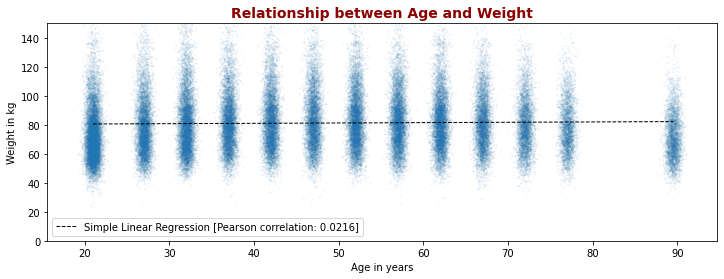

In [23]:
columns = ['WTKG3', 'AGE']
subset = brfss.dropna(subset=columns)[columns]
xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

# Extract weight and age add jittering both
weight_jitter = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))
age_jitter = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))

# Make the jitter plot
fig = plt.figure(figsize=(12,4))
plt.plot(age_jitter, weight_jitter, 'o', markersize=1, alpha=0.05)

# plot the linear regression
plt.plot(fx, fy, 'k--', lw=1, 
         label='Simple Linear Regression [Pearson correlation: {:.4f}]'.format(res.rvalue))

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.ylim([0, 150])
plt.title("Relationship between Age and Weight", **title_param)
plt.legend()
plt.show()

# <font color=darkred>3.13 Income and vegetables</font>

**Instructions**

As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

**Results**
- Extract the columns 'INCOME2' and '_VEGESU1' from subset into xs and ys respectively.
- Compute the simple linear regression of these variables.

<font color=darkgreen>Good job. The estimated slope tells you the increase in vegetable servings from one income group to the next.</font>

In [24]:
# Extract the variables
columns = ['INCOME2', '_VEGESU1']
subset = brfss.dropna(subset=columns)[columns]
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)
display(subset.corr())
print(subset.corr().iloc[0,1]==res.rvalue)

# Comparing float number
np.isclose(subset.corr().iloc[0,1], res.rvalue), subset.corr().iloc[0,1] - res.rvalue 

LinregressResult(slope=0.0698804809210502, intercept=1.5287786243363106, rvalue=0.11967005884864103, pvalue=1.3785039162482424e-238, stderr=0.0021109763563323335, intercept_stderr=0.013196467544093609)


,INCOME2,_VEGESU1
INCOME2,1.00000,0.11967
_VEGESU1,0.11967,1.00000


False


(True, 8.187894806610529e-16)

# <font color=darkred>3.14 Fit a line</font> 

Continuing from the previous exercise:
- Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and
- res contains the results of a simple linear regression of ys onto xs.

Now, you're going to compute the line of best fit. NumPy has been imported for you as np.

**Instructions**
- Set fx to the minimum and maximum of xs, stored in a NumPy array.
- Set fy to the points on the fitted line that correspond to the fx.

**Results**

<font color=darkgreen>Congratulations on completing Chapter 3! We've seen several ways to visualize relationships between variables and quantify their strength. In the next chapter we use regression to explore relationships among more than two variables.</font>

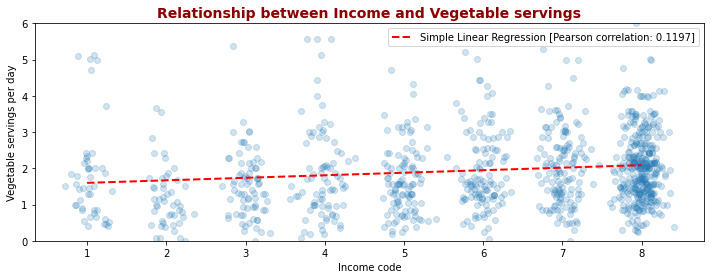

In [25]:
xs_first1000 = xs[:1000]
ys_first1000 = ys[:1000]

fx = np.array([xs_first1000.min(), xs_first1000.max()])
fy = res.intercept + res.slope * fx

# Plot the scatter plot
fig = plt.figure(figsize=(12,4))
x_jitter = xs_first1000 + np.random.normal(0, 0.15, len(xs_first1000))
plt.plot(x_jitter, ys_first1000, 'o', alpha=0.2)

# Plot the line of best fit
plt.plot(fx, fy, 'r--', lw=2, 
         label='Simple Linear Regression [Pearson correlation: {:.4f}]'.format(res.rvalue))


plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.title("Relationship between Income and Vegetable servings", **title_param)
plt.legend()
plt.show()

# Aditional material

- Datacamp course: https://learn.datacamp.com/courses/exploratory-data-analysis-in-python